In [1]:
import gc
import os
gc.collect()


os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import numpy as np
from tensorflow.compat.v1.keras.backend import set_session

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.compat.v1.Session(config=config))

import pandas as pd
import numpy as np
from collections import defaultdict
from tqdm import tqdm
import PIL

In [2]:
from plexusnet.architecture import LoadModel
model = LoadModel("./PlexusNET_BCR_10x_BEST_APPROACH_HUE/weight_98.h5")

In [ ]:
model.summary()

In [4]:
import tensorflow as tf
extract = tf.keras.Model(model.inputs, model.layers[-4].output)

In [5]:
test_set=pd.read_csv("./test_set_OnlyTumor.csv")

In [ ]:
images = []
for fl_ in tqdm(test_set.Filename):
        fl="/home/truebinding/coro/Research/prostate-cancer-cpcbn-anonymized/sorted.tma.matched.he.ihc/"+fl_[1:]
        img=np.array(PIL.Image.open(fl).resize((5120//4, 5120//4)))
        img=img[128:-128,128:-128]
        for j in range(0,img.shape[0]-256,256):
            for i in range(0, img.shape[1]-256,256):
                img_C=np.array(PIL.Image.fromarray(img[j:j+512,i:i+512]),dtype=np.uint8)
                images.append(img_C)

In [6]:
def RunAnalyses(model_best, dataset):
    results=defaultdict(list)
    heatmaps = defaultdict(list)
    predictions = defaultdict(list)
    for fl_ in tqdm(dataset.Filename):

        fl="/home/truebinding/coro/Research/prostate-cancer-cpcbn-anonymized/sorted.tma.matched.he.ihc/"+fl_[1:]
        img=np.array(PIL.Image.open(fl).resize((5120//4, 5120//4)))
        img=img[128:-128,128:-128]
        heatmap= np.zeros((3,3),dtype=np.float)
        patch = []
        for j in range(0,img.shape[0]-256,256):
            for i in range(0, img.shape[1]-256,256):
                img_C=np.array(PIL.Image.fromarray(img[j:j+512,i:i+512]),dtype=np.uint8)
                patch.append(img_C)
        pr=model_best.predict(np.array(patch), verbose=0)
        x=model.predict(np.array(patch), verbose=0)
        k=0
        '''
        for j in range(0,3):
            for i in range(0, 3):
                heatmap[j,i]=pr[k]
                k+=1
        '''
        heatmaps[fl]=heatmap
        results[fl]=pr
        predictions[fl]=x[...,-1]
    return heatmaps,results, predictions

In [ ]:
heatmaps,results, prediction = RunAnalyses(extract, test_set)

In [81]:
features = []
for k in results:
    features.extend(results[k])

In [82]:
y_predict = []
for k in prediction:
    y_predict.extend(prediction[k])

In [85]:
y_predict=np.array(y_predict)

In [86]:
features=np.array(features)

In [7]:
labels=test_set["X1st.BCR.Type"]=="First PSA of at least 0.2 and rising"

In [8]:
labels_=labels.tolist()
y_ = []
for y in labels_:
    y_.extend([y]*9)


In [9]:
labels=y_

In [ ]:
len(labels)

In [11]:
features=np.load("./features_PlexusNET.npy")

In [12]:

y_predict=np.load("./y_predict_PlexusNET.npy")

In [13]:
features_np=np.average(features.reshape((17082,16*16,64)), axis=-2)

BCR vs nonBCR

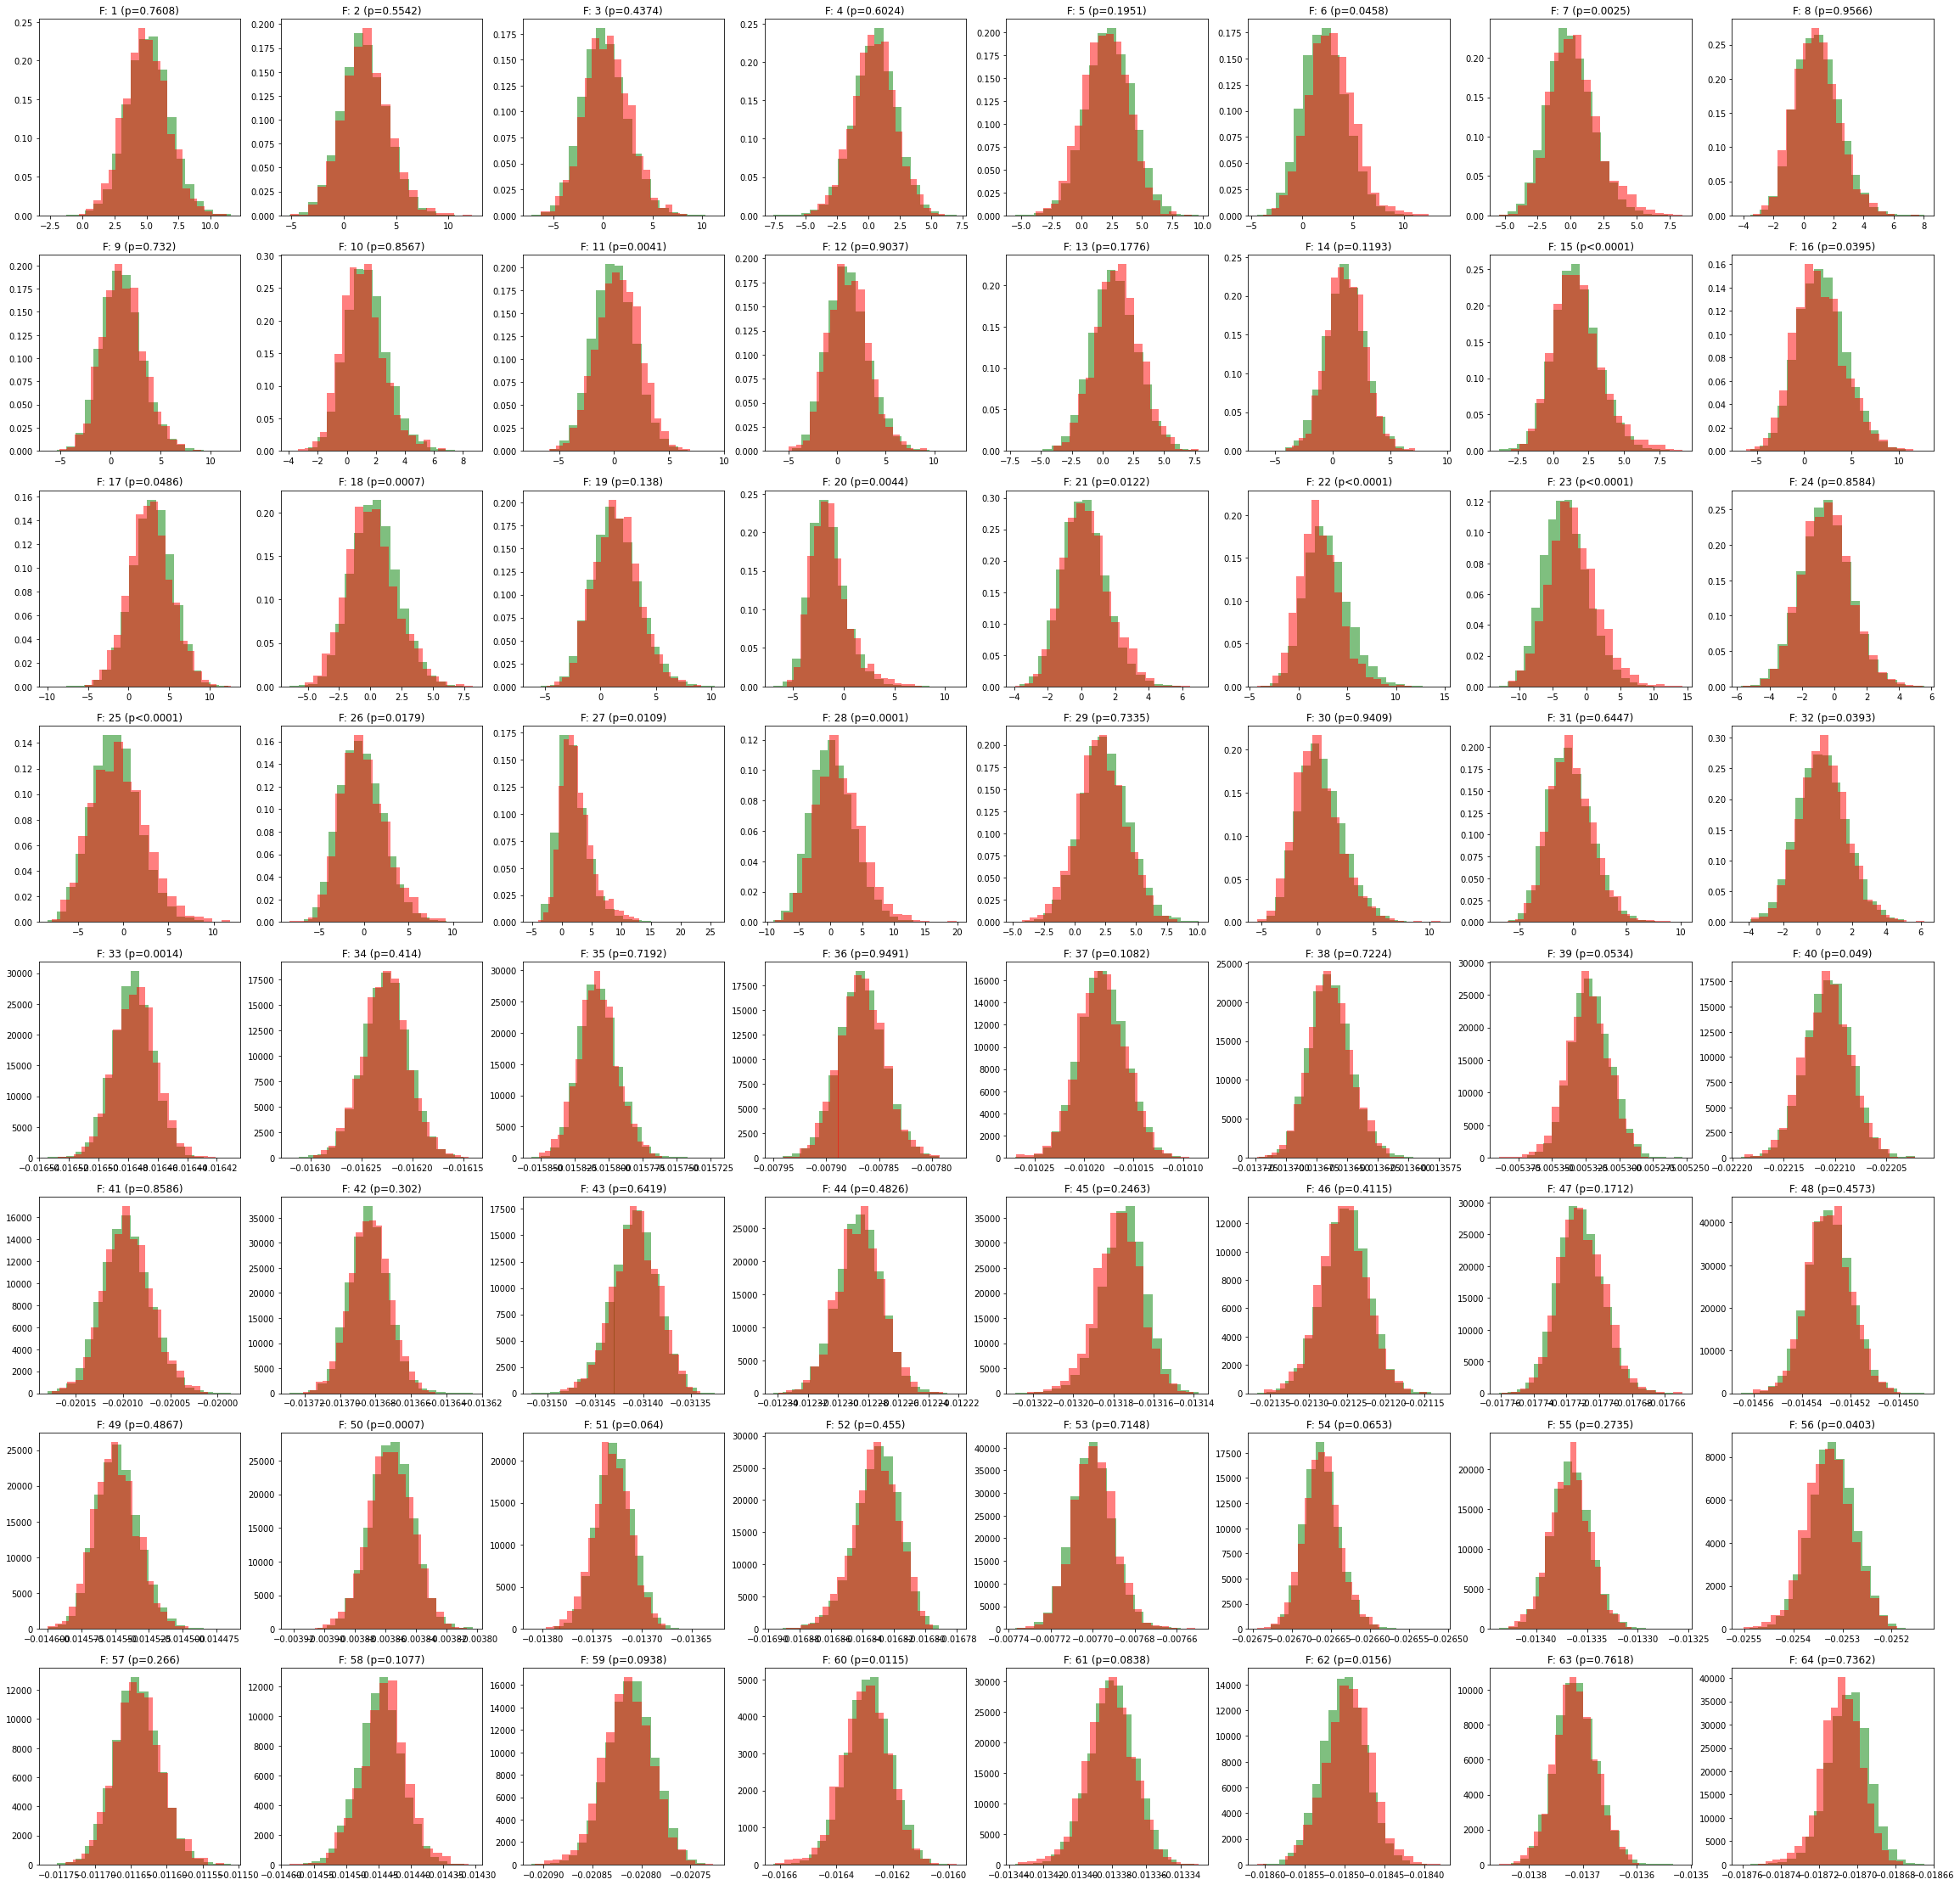

In [467]:
import matplotlib.pyplot as plt
from scipy.stats import levene

plt.figure(figsize=(40,40))
#plt.figure(0)
counter = 0
features_p_values = {}
for i in range(8):
        for j in range(8):
            ax=plt.subplot2grid((8,8), (i,j))
            b=len(np.array(labels)[np.array(labels)==False])
            #print(b)
            ax.hist(features_np[np.array(labels)==False][...,counter].flatten(), bins=20,density=True, facecolor='g', alpha=0.50)
            b=len(np.array(labels)[np.array(labels)==True])
            #print(b)
            ax.hist(features_np[np.array(labels)==True][...,counter].flatten(), bins=20,density=True, facecolor='r', alpha=0.50)
            x=features_np[np.array(labels)==False][...,counter].flatten()
            y=features_np[np.array(labels)==True][...,counter].flatten()
            b=levene(x,y)#, center="trimmed")
            pv=b.pvalue
            features_p_values[counter+1]=pv
            if pv<0.0001:
                pv="<0.0001"
            else:
                pv=f"={round(b.pvalue,4)}"
            ax.set_title(f"F: {counter+1} (p{pv})" )
            counter+=1
plt.savefig(f"BCR_feature_global_poolinng.tif", dpi=300)

plt.show()

In [79]:
label_pred =np.digitize(y_predict, bins=[-0.1,0.06,0.43,0.75,1.1], right=False)
#1 [0-0.06)
#2 [0.06 - 0.43)
#3 [0.43 - 0.75)
#4 [0.75 - 1.0)

In [101]:
features_sign_by_groups = {}

Low-risk group

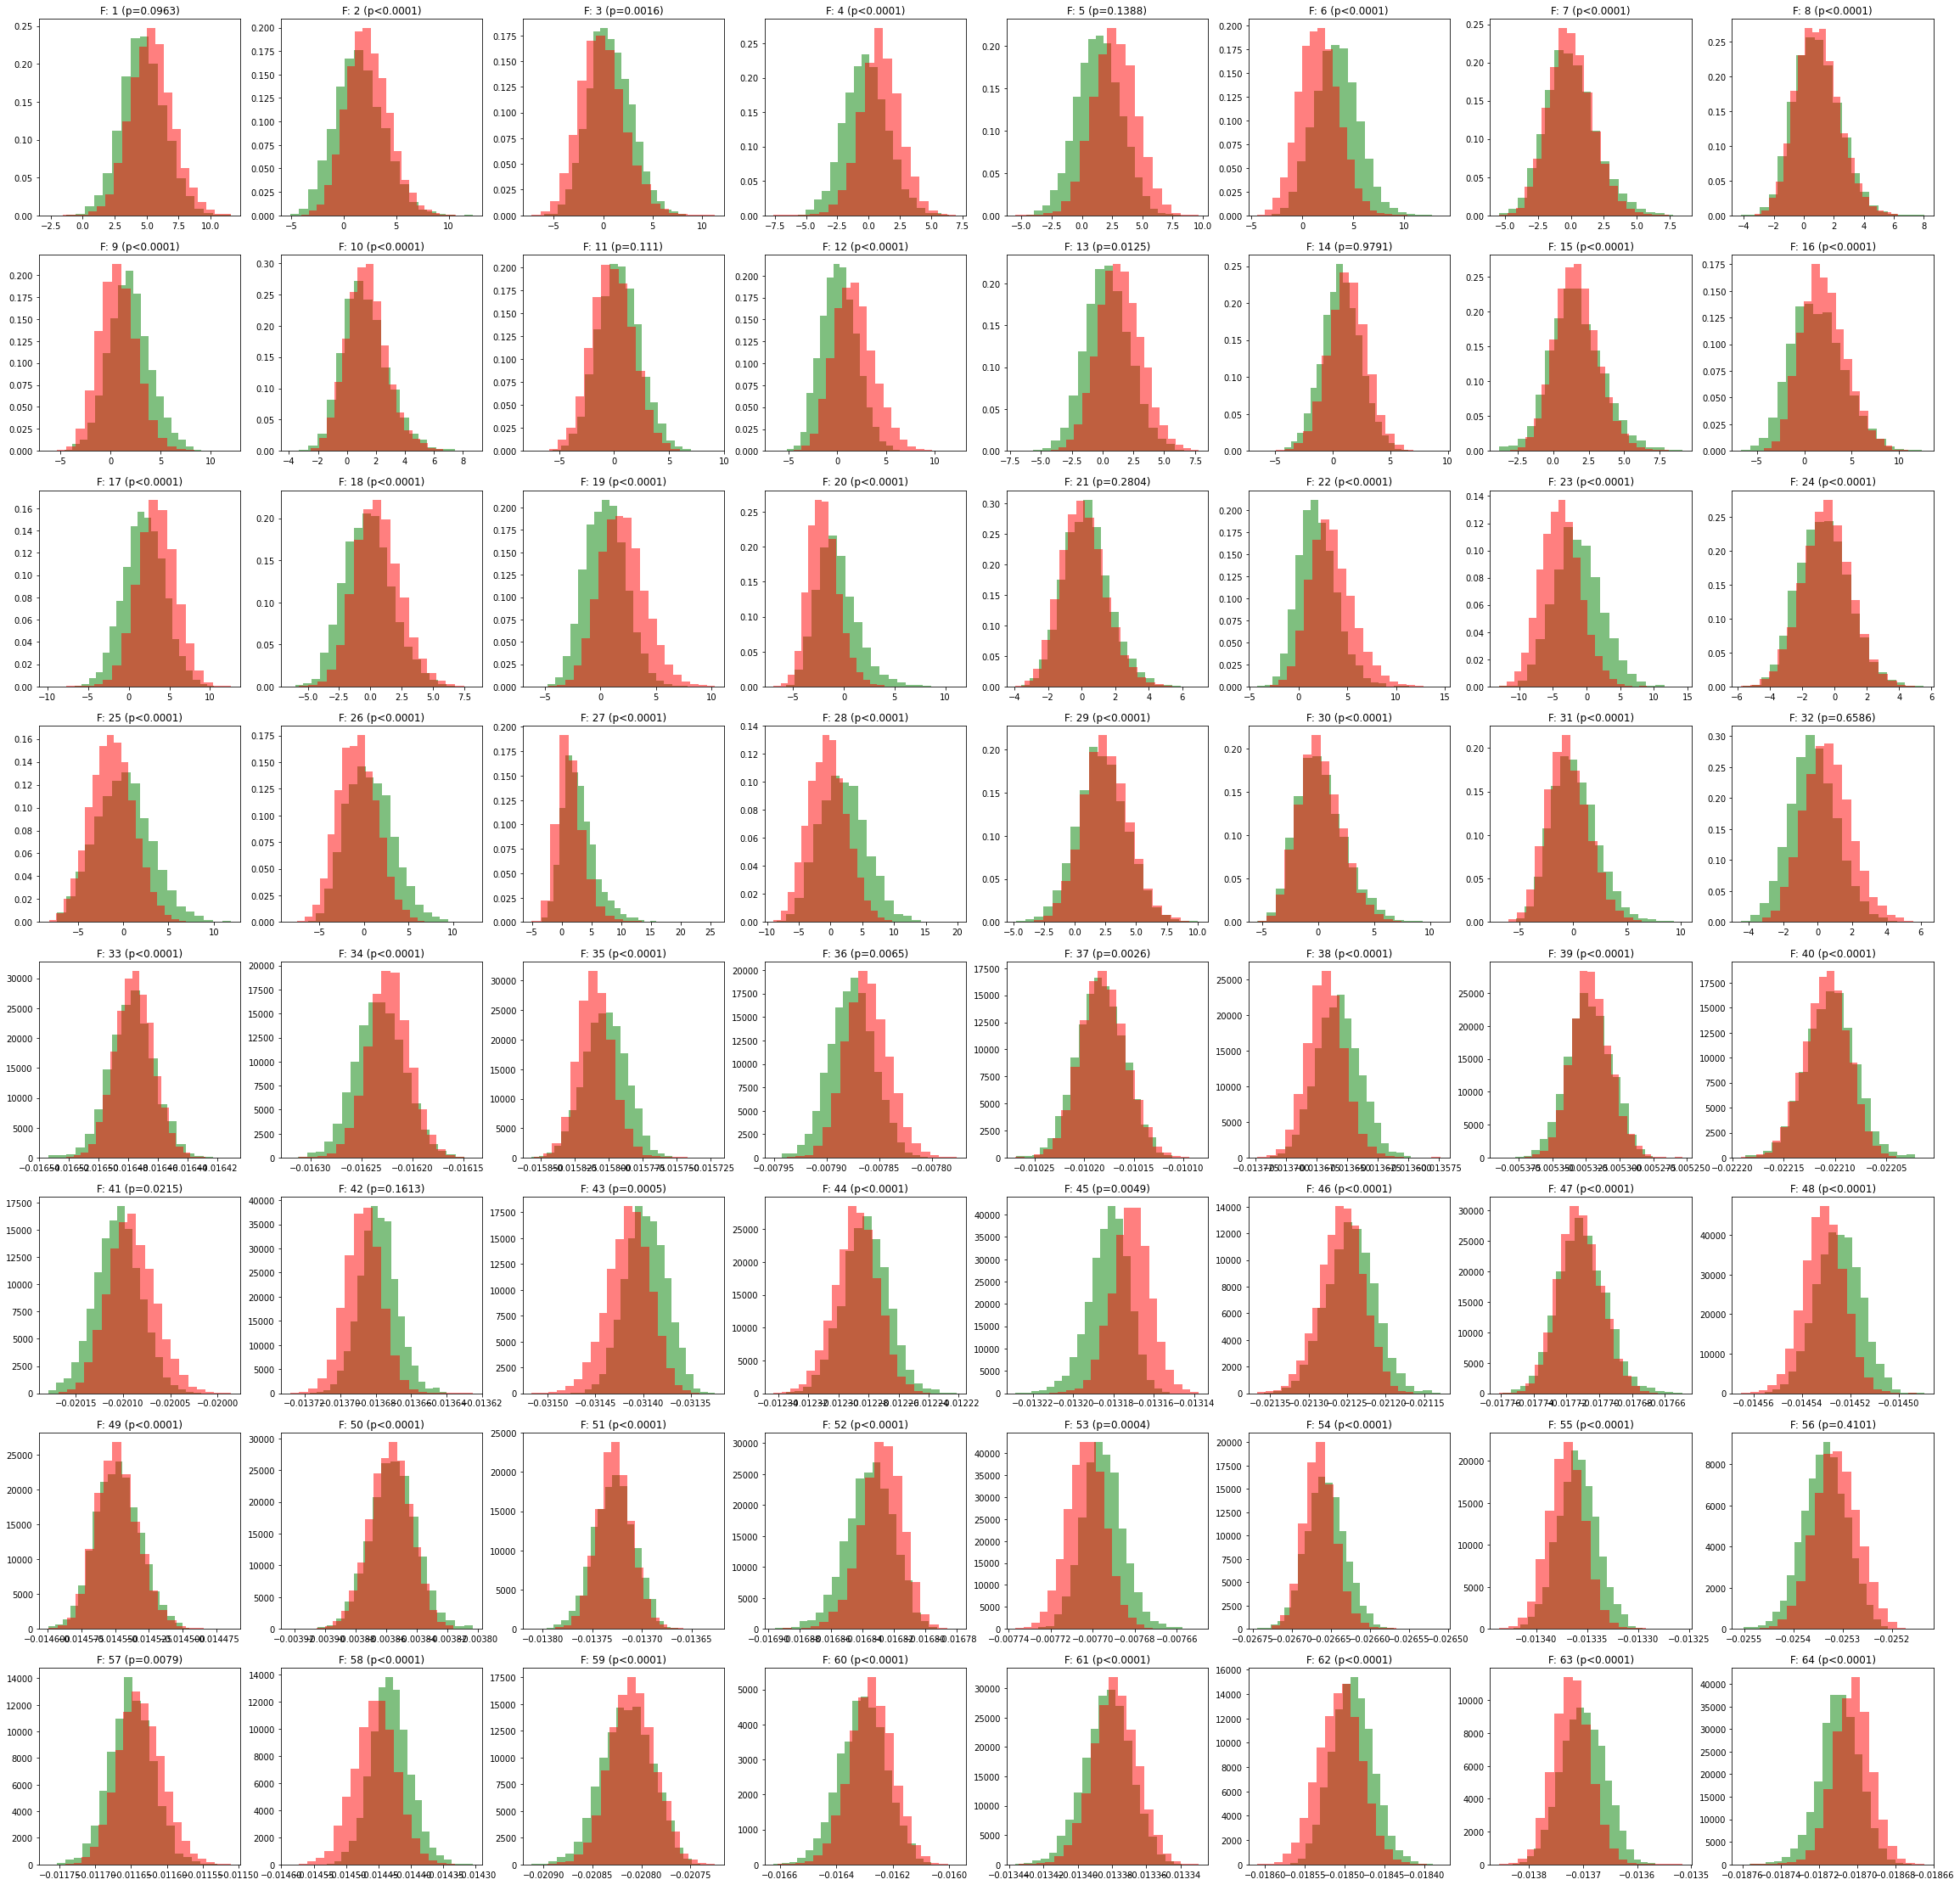

{20: 3.3690273942073964e-112, 25: 3.3209404465477354e-96, 28: 7.573688545154464e-71, 35: 4.261714921124814e-56, 16: 2.1513013253593707e-55, 26: 1.1607876751828125e-50, 23: 9.48992401131875e-49, 15: 2.1725551612838497e-48, 51: 2.17388023787118e-48, 54: 1.6061791292108004e-44, 63: 2.6079766025901025e-43, 34: 1.6278182737903023e-40, 33: 7.174946241416544e-37, 27: 4.5937390028801694e-35, 38: 3.204165404374126e-34, 7: 1.4427086886951284e-27, 2: 4.528637754539644e-27, 52: 8.074501777438267e-27, 12: 1.0745069117243415e-25, 22: 4.663757032011692e-25, 39: 1.22211552476704e-24, 59: 7.689718203561091e-24, 40: 9.718146004847217e-21, 47: 1.5115974882532145e-20, 58: 2.2986762658925893e-20, 10: 6.787607102287952e-20, 19: 1.0330025454450114e-19, 48: 4.800713380840585e-19, 30: 1.41916987134786e-18, 46: 7.367045574923013e-18, 4: 1.2262891792686958e-16, 50: 6.983383736344515e-16, 6: 2.4995853952593894e-15, 9: 2.3083102128568023e-13, 31: 5.2367084223203e-12, 60: 2.4255518575575806e-11, 49: 3.1074619511844

In [463]:
plt.figure(figsize=(40,40))
#plt.figure(0)
counter = 0
features_p_values = {}
target_class =1
for i in range(8):
        for j in range(8):
            ax=plt.subplot2grid((8,8), (i,j))
            ax.hist(features_np[np.array(label_pred)!=target_class][...,counter].flatten(), bins=20,density=True, facecolor='g', alpha=0.50)
            ax.hist(features_np[np.array(label_pred)==target_class][...,counter].flatten(), bins=20,density=True, facecolor='r', alpha=0.50)
            x=features_np[np.array(label_pred)!=target_class][...,counter].flatten()
            y=features_np[np.array(label_pred)==target_class][...,counter].flatten()
            b=levene(x,y)#,center="median")#, center="trimmed")
            pv=b.pvalue
            features_p_values[counter+1]=pv

            if pv<0.0001:
                pv="<0.0001"
            else:
                pv=f"={round(b.pvalue,4)}"
            ax.set_title(f"F: {counter+1} (p{pv})" )
            counter+=1
plt.savefig(f"{target_class}_feature_global_poolinng.tif", dpi=300)

plt.show()

print({k: v for k,v in sorted(features_p_values.items(), key=lambda item: item[1])})

feature_different={k: v for k,v in sorted(features_p_values.items(), key=lambda item: item[1]) if v<0.0001}
features_sign_by_groups[target_class]=list(feature_different.keys())

for rev in [25,23,22,15]:
    if rev in feature_different:
        print(rev,feature_different[rev])

Low-intermediate group

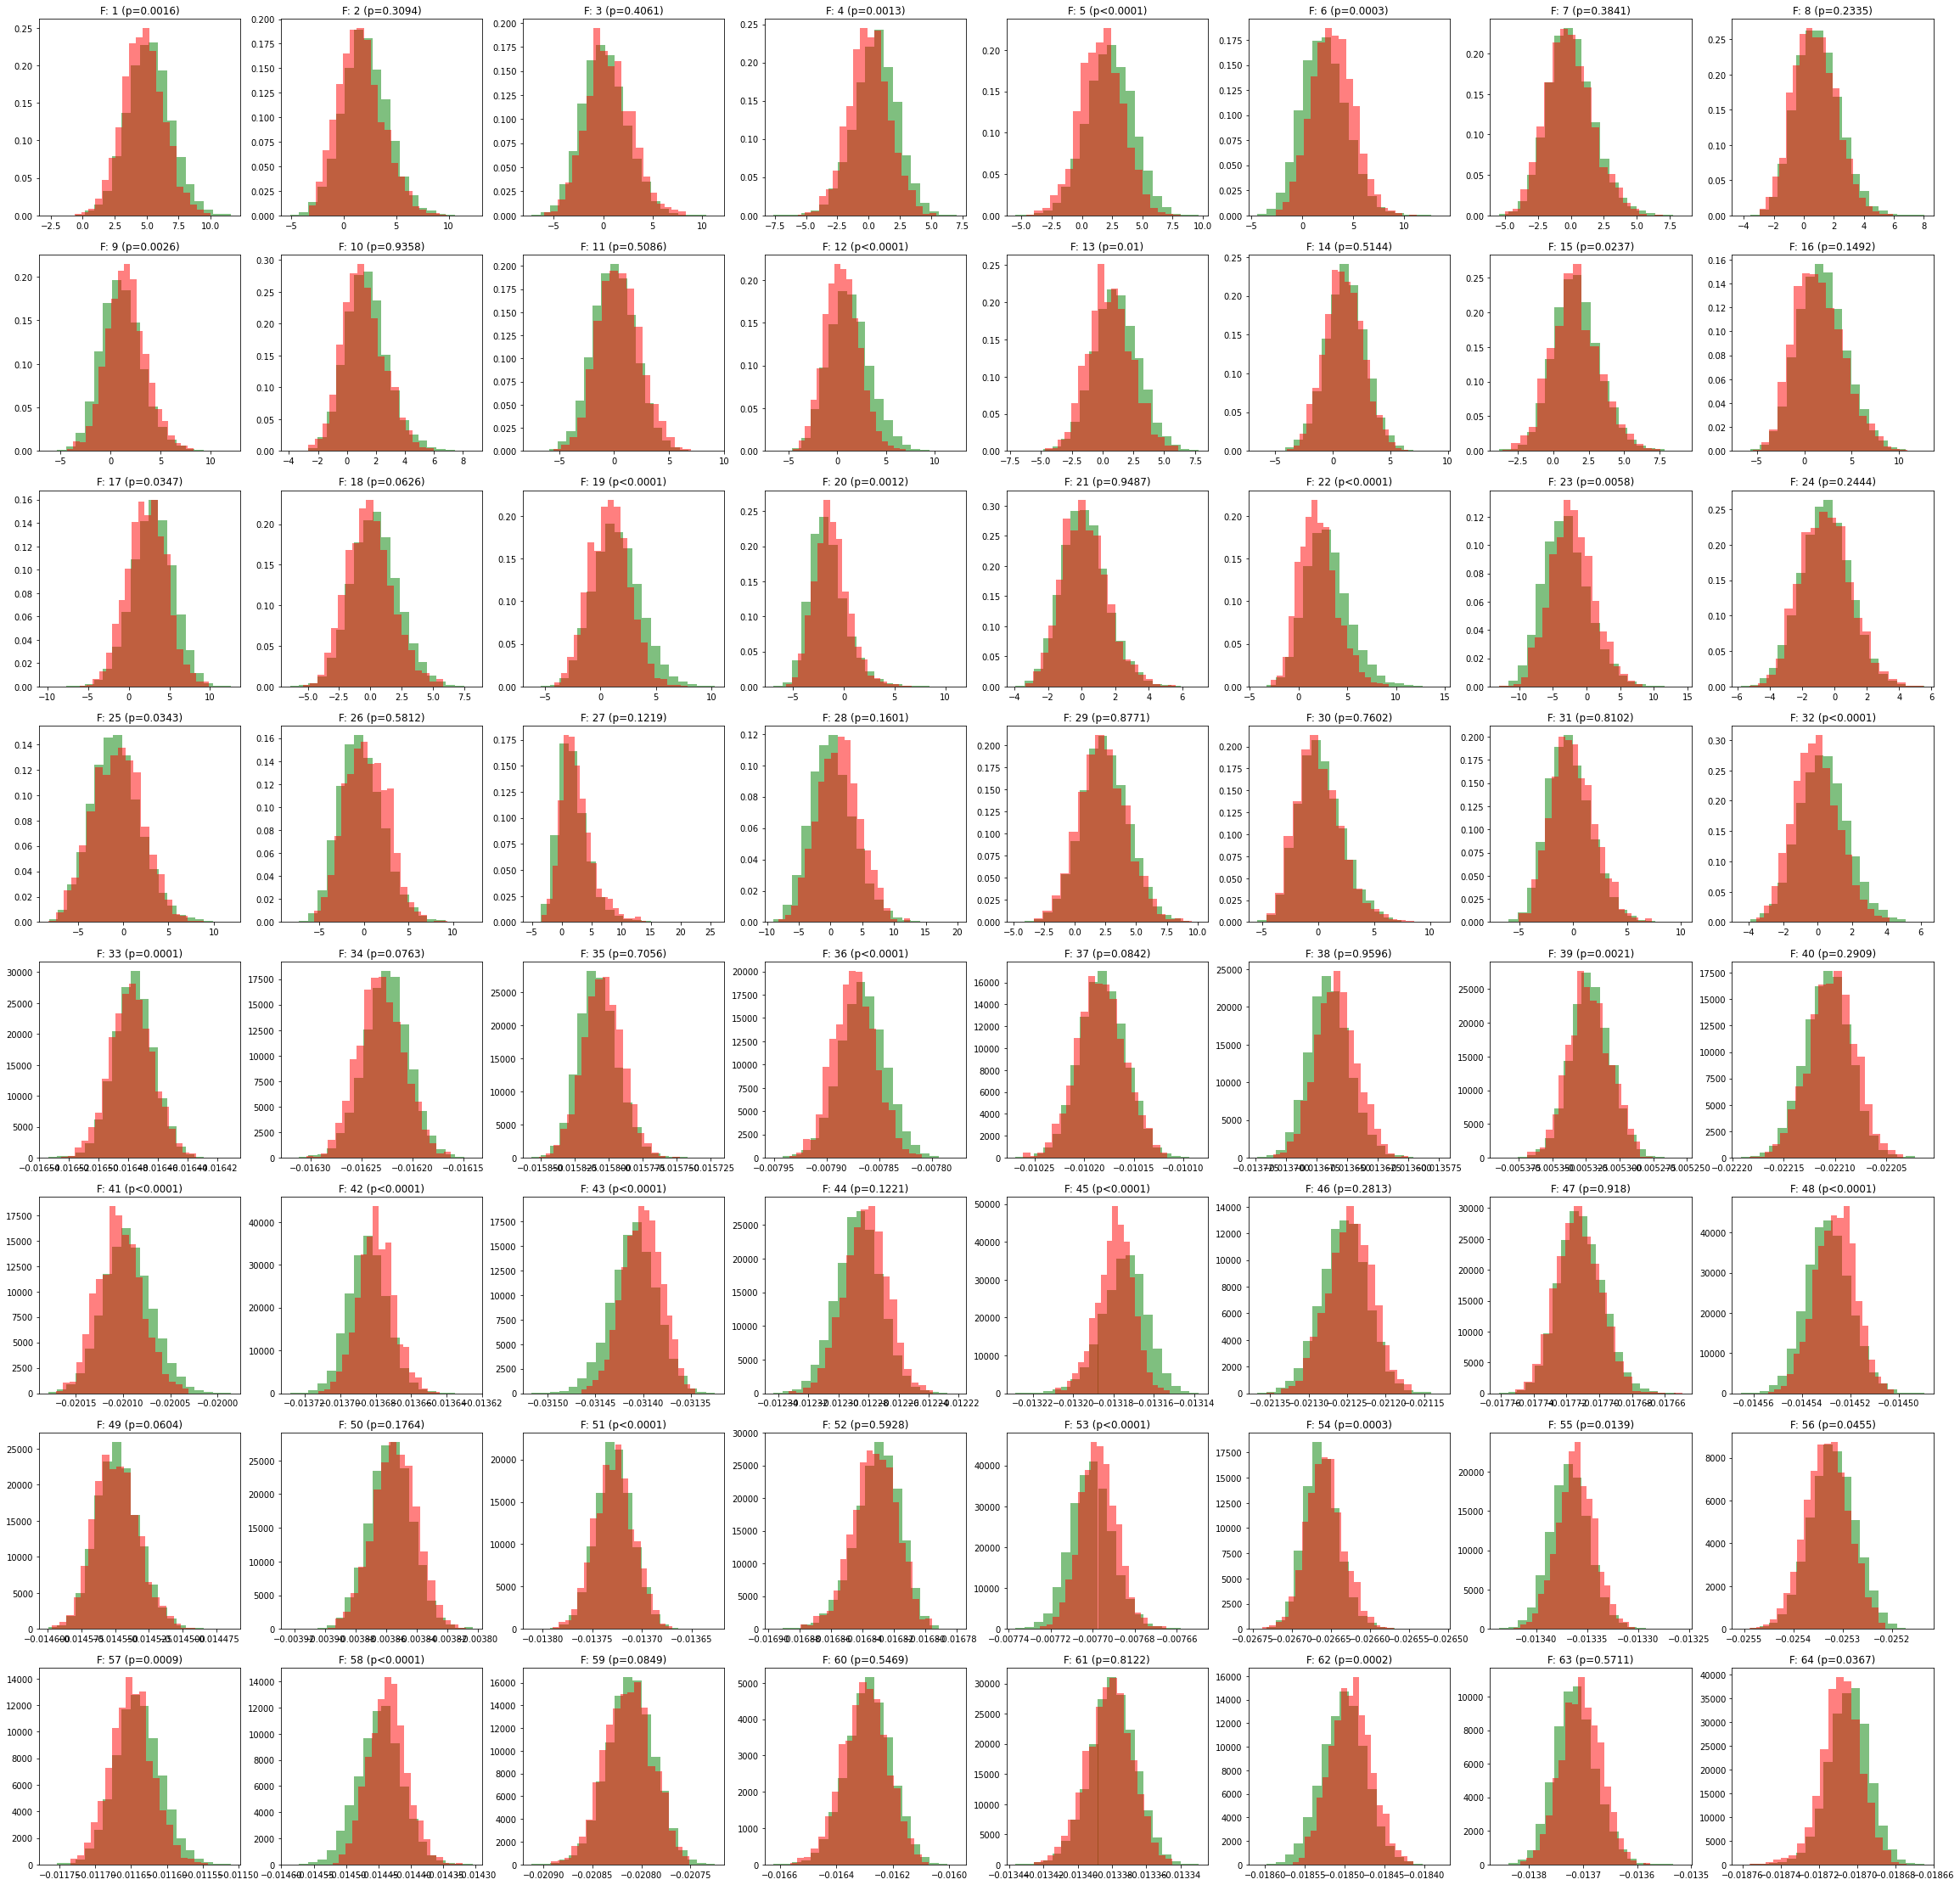

{45: 6.872993139611154e-32, 12: 3.936855496672373e-21, 19: 2.068035728786173e-16, 43: 7.874392441344103e-16, 58: 3.624640027588037e-15, 22: 5.7226247873509576e-15, 53: 2.3342841718993924e-11, 42: 3.924294435297875e-08, 41: 7.290251652103812e-07, 48: 1.297138502640471e-06, 36: 3.399081343137856e-06, 32: 3.470946568104442e-06, 51: 1.2578716727809435e-05, 5: 7.771652376525437e-05, 33: 0.00010049595392456288, 62: 0.00022048040164979787, 6: 0.00026955612818568945, 54: 0.0002960211785197155, 57: 0.0008850126670820836, 20: 0.0011726757571634567, 4: 0.001292058181291529, 1: 0.001627057047194218, 39: 0.002078164516935842, 9: 0.0025785101598359015, 23: 0.005784047140608597, 13: 0.009976756425526773, 55: 0.013867825323970191, 15: 0.023652243604788754, 25: 0.03429941045069991, 17: 0.03473664819204222, 64: 0.036670409041719025, 56: 0.04553456765965292, 49: 0.06039348928325739, 18: 0.0625836168747713, 34: 0.07632111197041098, 37: 0.08421785130293048, 59: 0.08493815701241175, 27: 0.12187049028203757,

In [464]:
plt.figure(figsize=(40,40))
#plt.figure(0)
counter = 0
features_p_values = {}
target_class =2
for i in range(8):
        for j in range(8):
            ax=plt.subplot2grid((8,8), (i,j))
            ax.hist(features_np[np.array(label_pred)!=target_class][...,counter].flatten(), bins=20,density=True, facecolor='g', alpha=0.50)
            ax.hist(features_np[np.array(label_pred)==target_class][...,counter].flatten(), bins=20,density=True, facecolor='r', alpha=0.50)
            x=features_np[np.array(label_pred)!=target_class][...,counter].flatten()
            y=features_np[np.array(label_pred)==target_class][...,counter].flatten()
            b=levene(x,y)#,center="median")#, center="trimmed")
            pv=b.pvalue
            features_p_values[counter+1]=pv

            if pv<0.0001:
                pv="<0.0001"
            else:
                pv=f"={round(b.pvalue,4)}"
            ax.set_title(f"F: {counter+1} (p{pv})" )
            counter+=1
plt.savefig(f"{target_class}_feature_global_poolinng.tif", dpi=300)

plt.show()

print({k: v for k,v in sorted(features_p_values.items(), key=lambda item: item[1])})
feature_different={k: v for k,v in sorted(features_p_values.items(), key=lambda item: item[1]) if v<0.0001}
features_sign_by_groups[target_class]=list(feature_different.keys())
#24,22,21,14
for rev in [25,23,22,15]:
    if rev in feature_different:
        print(rev,feature_different[rev])

High-intermediate group

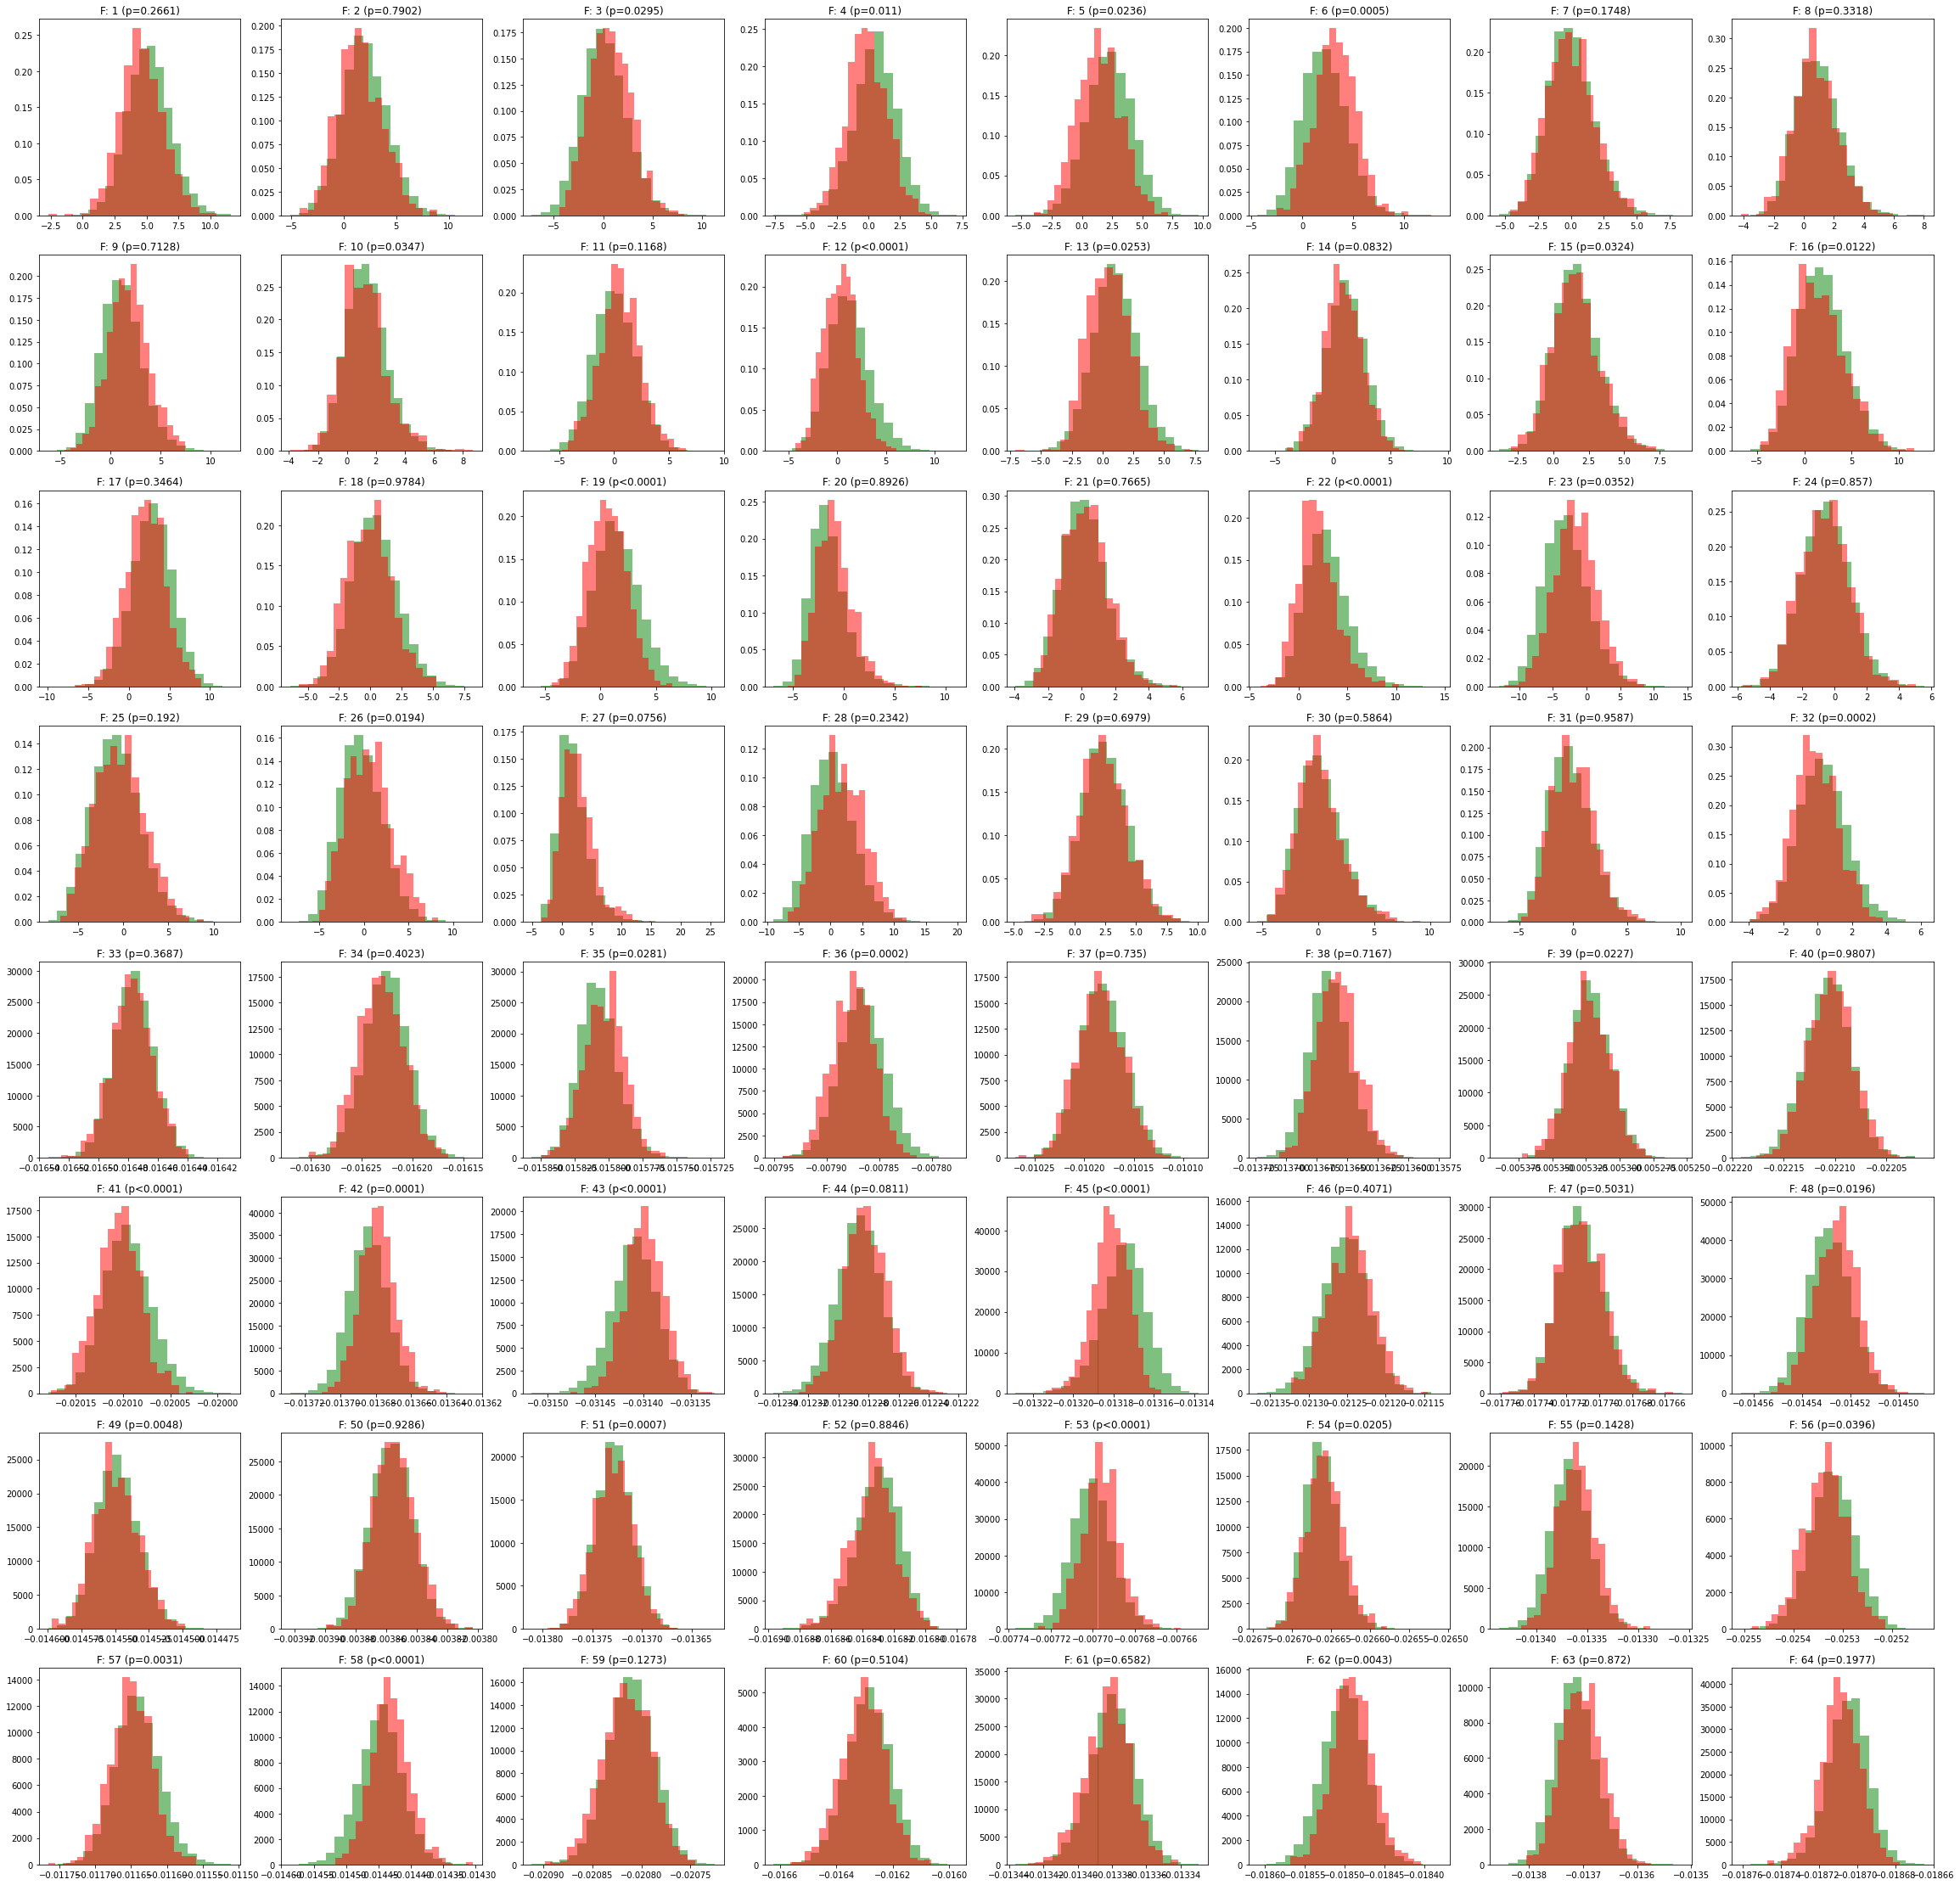

{45: 2.0101572053672296e-14, 12: 6.7474428996128e-12, 19: 5.849213350297032e-10, 43: 1.3490267575820686e-08, 58: 2.9500187658743287e-07, 53: 3.9143847012886423e-07, 22: 1.9468464537197764e-06, 41: 5.492821305059399e-05, 42: 0.0001121919878810584, 36: 0.00015167698407061734, 32: 0.00024184553028165255, 6: 0.0005335801302466268, 51: 0.0007346740648494237, 57: 0.0031484144851789972, 62: 0.0043193503356978675, 49: 0.004792461329161757, 4: 0.010986914147711075, 16: 0.012233591735266698, 26: 0.019417311137120898, 48: 0.019581708034779256, 54: 0.020459473885470064, 39: 0.02265597179986804, 5: 0.02357077005197451, 13: 0.025332859764906575, 35: 0.028094026452672782, 3: 0.029459065028399217, 15: 0.0323815176538451, 10: 0.03466981406613487, 23: 0.035226138516214305, 56: 0.03964605484177777, 27: 0.07561679596811414, 44: 0.08113067419377631, 14: 0.08315868537465669, 11: 0.11675407147777013, 59: 0.1273439752822526, 55: 0.1428148890102971, 7: 0.17477974101382, 25: 0.19200275158661556, 64: 0.197687633

In [465]:
plt.figure(figsize=(40,40))
#plt.figure(0)
counter = 0
features_p_values = {}
target_class =3
for i in range(8):
        for j in range(8):
            ax=plt.subplot2grid((8,8), (i,j))
            ax.hist(features_np[np.array(label_pred)!=target_class][...,counter].flatten(), bins=20,density=True, facecolor='g', alpha=0.50)
            
            ax.hist(features_np[np.array(label_pred)==target_class][...,counter].flatten(), bins=20,density=True, facecolor='r', alpha=0.50)
            x=features_np[np.array(label_pred)!=target_class][...,counter].flatten()
            y=features_np[np.array(label_pred)==target_class][...,counter].flatten()
            b=levene(x,y)#,center="median")#, center="trimmed")
            pv=b.pvalue
            features_p_values[counter+1]=pv

            if pv<0.0001:
                pv="<0.0001"
            else:
                pv=f"={round(b.pvalue,4)}"
            ax.set_title(f"F: {counter+1} (p{pv})" )
            counter+=1
plt.savefig(f"{target_class}_feature_global_poolinng.tif", dpi=300)

plt.show()

print({k: v for k,v in sorted(features_p_values.items(), key=lambda item: item[1])})
feature_different={k: v for k,v in sorted(features_p_values.items(), key=lambda item: item[1]) if v<0.0001}
features_sign_by_groups[target_class]=list(feature_different.keys())
#24,22,21,14
for rev in [25,23,22,15]:
    if rev in feature_different:
        print(rev,feature_different[rev])

High-risk group

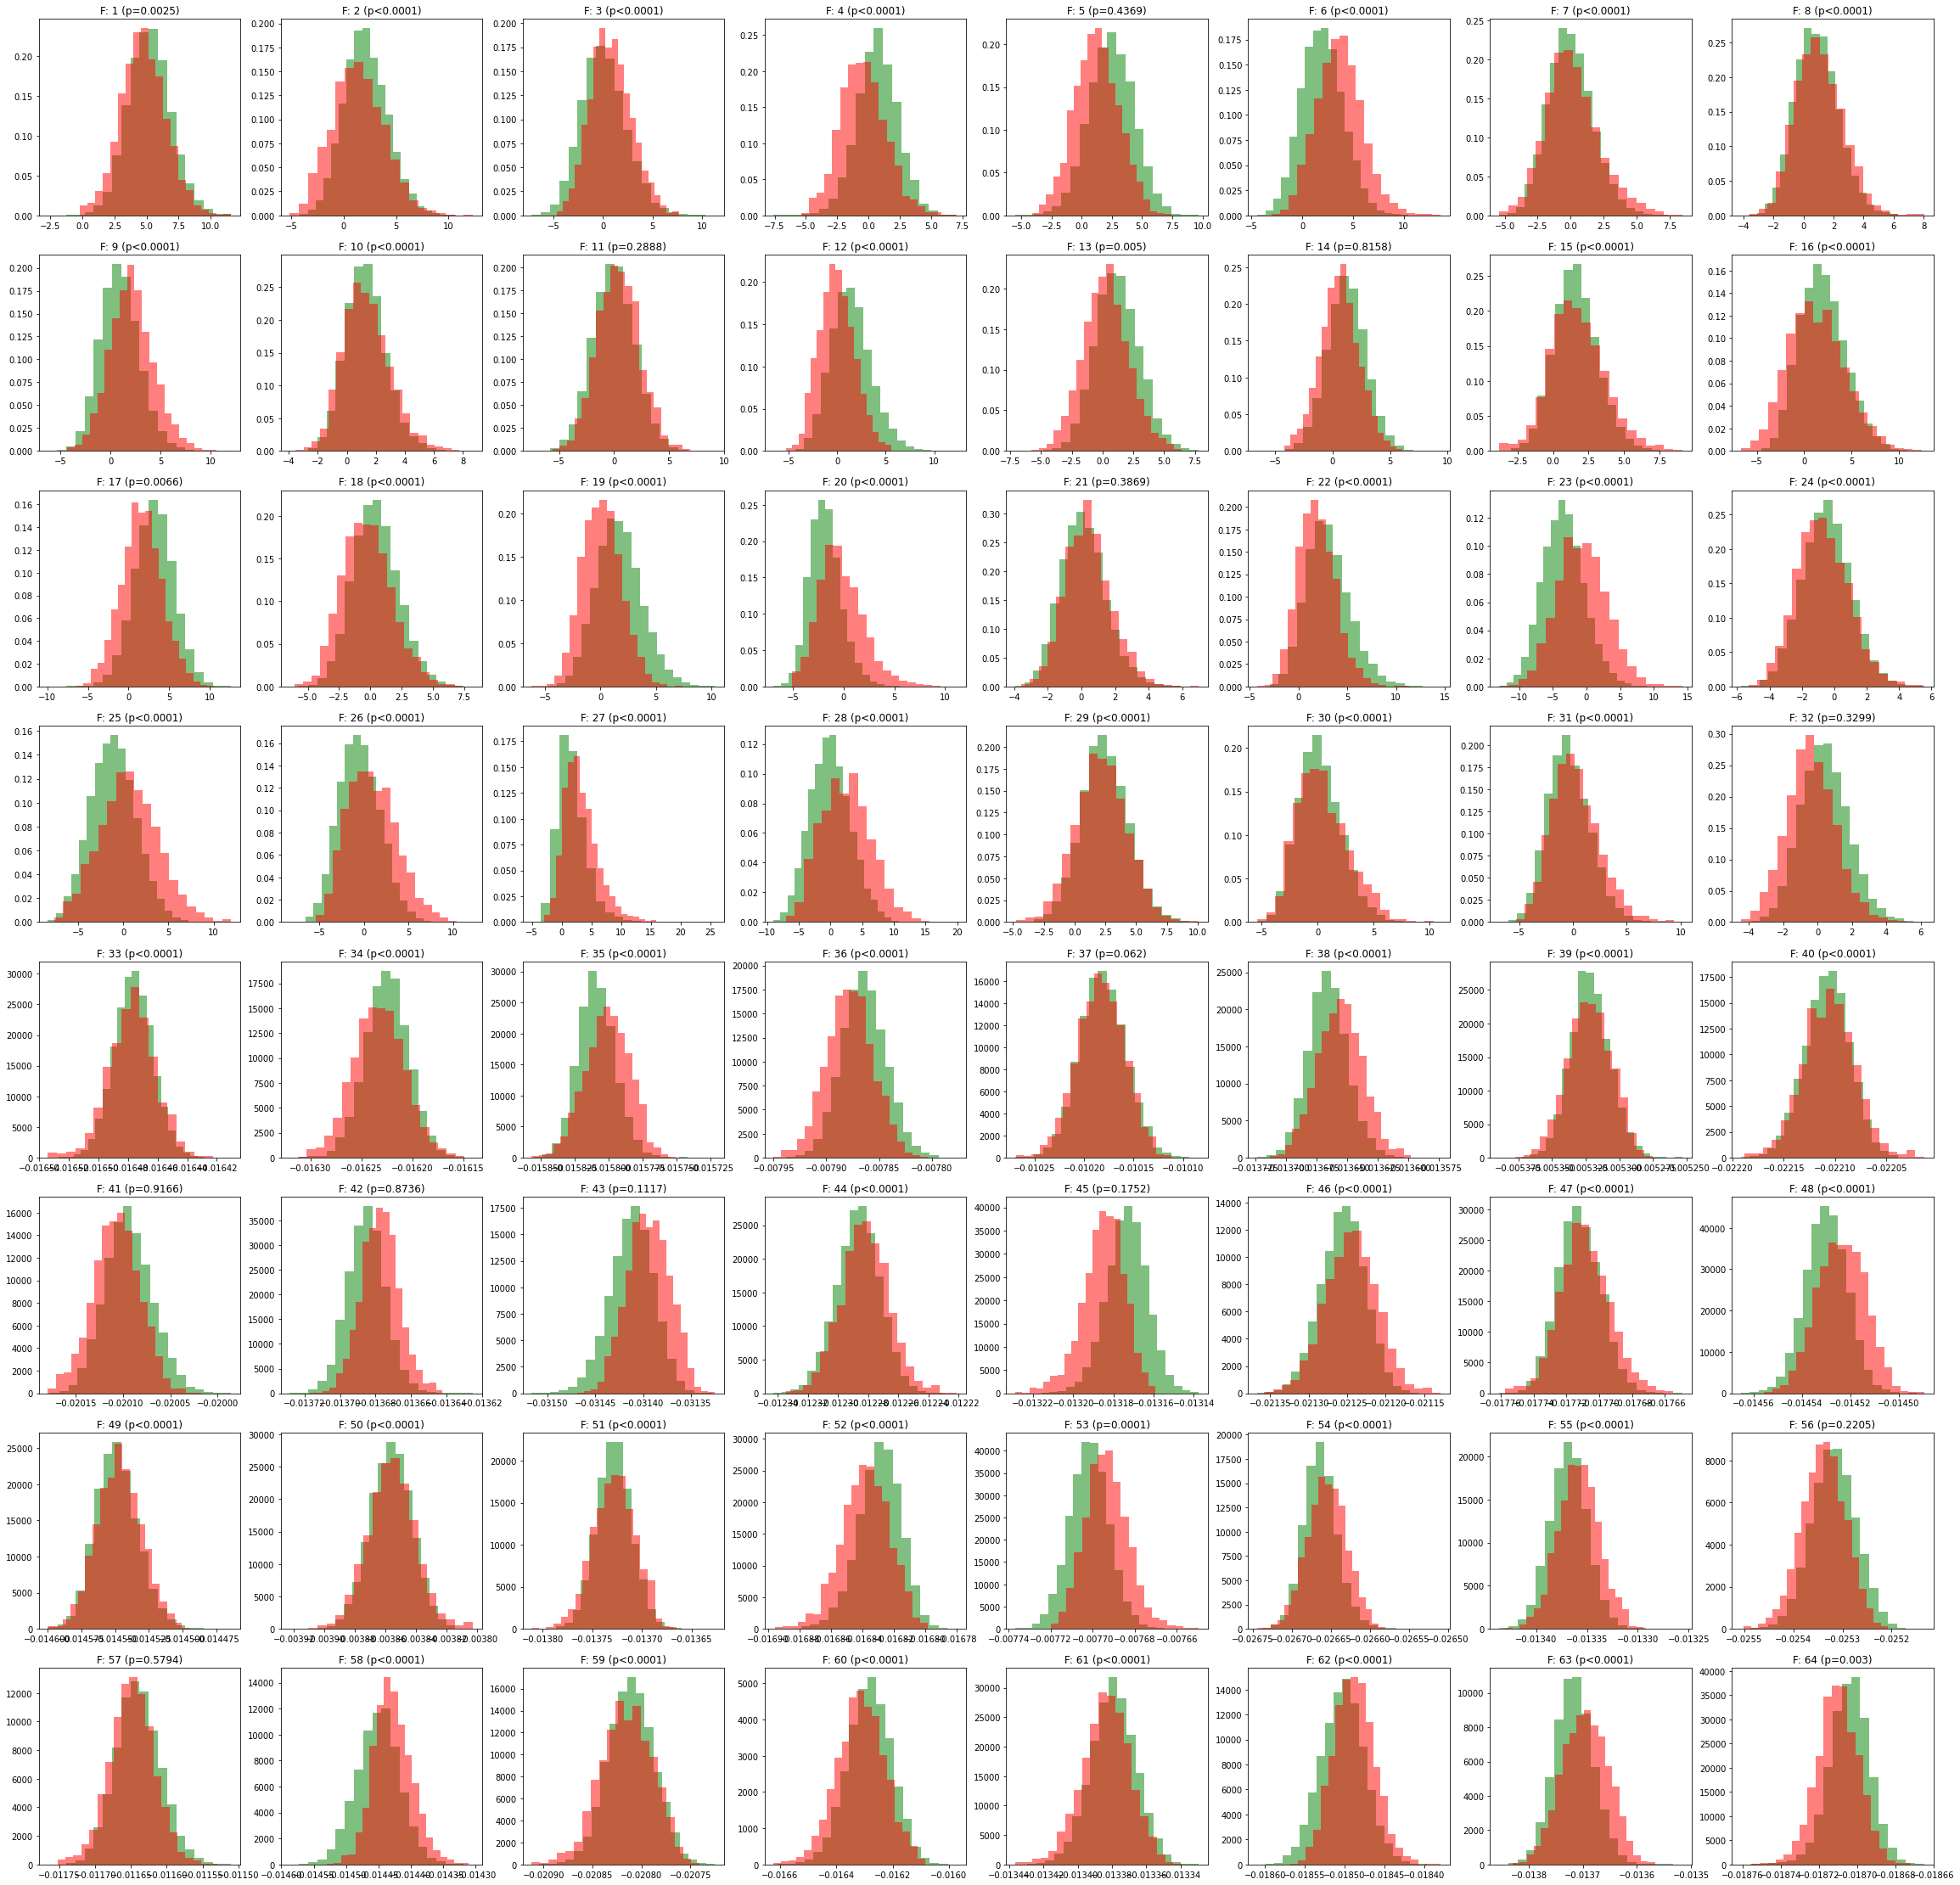

{20: 9.286833806844845e-114, 25: 1.9815300352044697e-74, 16: 2.1163133369543765e-56, 28: 3.095586425217501e-54, 15: 2.8649782996688224e-51, 26: 9.468367940717375e-42, 35: 1.8707177958869775e-39, 63: 1.6616615802952568e-38, 2: 6.2866643813670925e-37, 34: 5.883270663899316e-36, 51: 1.5154946481885328e-35, 23: 3.114654553628034e-35, 7: 3.760894250037066e-33, 33: 8.443826279011763e-32, 30: 3.271002595678883e-30, 54: 1.345088811766786e-27, 47: 7.501881996959743e-25, 40: 1.0397445322871995e-24, 48: 1.6124222811255504e-24, 46: 3.689842197220662e-24, 38: 3.025948949688335e-23, 10: 3.1904039551459036e-22, 59: 2.218627066528934e-21, 27: 1.3948089364369787e-19, 19: 3.2556948149616095e-18, 39: 6.069387335724566e-18, 52: 2.5973504076743833e-17, 50: 4.7102898904719165e-17, 22: 1.7234009321049538e-16, 58: 1.4296700625713434e-15, 12: 7.237800863819397e-15, 31: 1.1367795963090467e-14, 4: 1.6039840726090065e-12, 9: 7.578465183282817e-11, 8: 1.2321599698395742e-10, 29: 1.4728366633904256e-10, 55: 3.50637

In [462]:
plt.figure(figsize=(40,40))
#plt.figure(0)
counter = 0
features_p_values = {}
target_class =4
for i in range(8):
        for j in range(8):
            ax=plt.subplot2grid((8,8), (i,j))
            ax.hist(features_np[np.array(label_pred)!=target_class][...,counter].flatten(), bins=20,density=True, facecolor='g', alpha=0.50)

            ax.hist(features_np[np.array(label_pred)==target_class][...,counter].flatten(), bins=20,density=True, facecolor='r', alpha=0.50)
            x=features_np[np.array(label_pred)!=target_class][...,counter].flatten()
            y=features_np[np.array(label_pred)==target_class][...,counter].flatten()
            b=levene(x,y)#,center="median")#, center="trimmed")
            pv=b.pvalue
            features_p_values[counter+1]=pv

            if pv<0.0001:
                pv="<0.0001"
            else:
                pv=f"={round(b.pvalue,4)}"
            ax.set_title(f"F: {counter+1} (p{pv})" )
            counter+=1
plt.savefig(f"{target_class}_feature_global_poolinng.tif", dpi=300)
plt.show()

print({k: v for k,v in sorted(features_p_values.items(), key=lambda item: item[1])})
feature_different={k: v for k,v in sorted(features_p_values.items(), key=lambda item: item[1]) if v<0.0001}
features_sign_by_groups[target_class]=list(feature_different.keys())
#24,22,21,14
for rev in [25,23,22,15]:
    if rev in feature_different:
        print(rev,feature_different[rev])